Point2D(-9/5, 14/5) Point2D(-3/2, 3) Point2D(1, 3) Point2D(3/2, 1) Point2D(2, 2) Point2D(0, 1)
[Point2D(-9/5, 14/5), Point2D(-3/2, 3), Point2D(1, 3), Point2D(3/2, 1), Point2D(2, 2), Point2D(0, 1)]
sorted [Point2D(0, 1), Point2D(-9/5, 14/5), Point2D(-3/2, 3), Point2D(1, 3), Point2D(2, 2), Point2D(3/2, 1)]
0
[Point2D(-9/5, 14/5), Point2D(-3/2, 3), Point2D(1, 3), Point2D(3/2, 1)] Point2D(-9/5, 14/5) Point2D(-3/2, 3) Point2D(1, 3) Point2D(3/2, 1)
Segment2D(Point2D(0, 0), Point2D(1, 0))
Segment2D(Point2D(1, 0), Point2D(2, 2))
Segment2D(Point2D(2, 2), Point2D(0, 4))
Segment2D(Point2D(0, 4), Point2D(-3, 2))
Segment2D(Point2D(-3, 2), Point2D(0, 0))


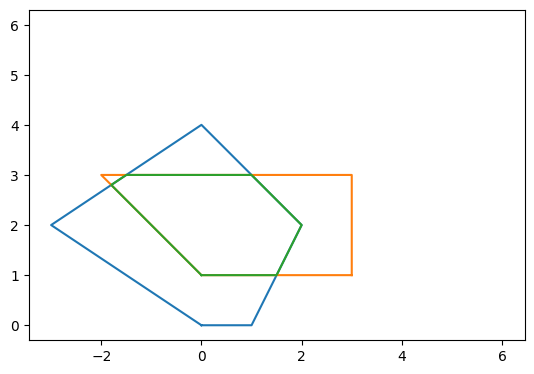

In [1]:
from sympy import Polygon, Line, Point2D, Segment2D, intersection
from math import atan2, pi, cos, sin
import matplotlib.pyplot as plt

poly1 = Polygon((0,0), (1,0), (2,2), (0,4), (-3,2))
poly2 = Polygon((3,1),(3,3),(-2,3),(0,1))


def plot_polygon(poly, l='-'):
    
    coords = []
    first = None
    
    for v in poly.vertices:
        if first == None:
            first = v
        
        coords.append([v.x, v.y])
        
    coords.append([first.x, first.y])
        
    xs, ys = zip(*coords)
    plt.plot(xs, ys, linestyle=l)
    
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')


def polygon_intersection(poly1, poly2):
    p = intersection(poly1, poly2)
    
    for _ in poly1.vertices:
        if poly2.encloses_point(_) and not _ in p:
            p.append(_)
            
    for _ in poly2.vertices:
        if poly1.encloses_point(_) and not _ in p:
            p.append(_)

    print(*p)
    
    poly3 = Polygon(*p)

    print(poly3.vertices)

    poly3 = sort_polygon_vertices(poly3)

    print('sorted', poly3.vertices)
    
    return poly3

def sort_polygon_vertices(poly):
    cx, cy = 0, 0
    n = len(poly.vertices)
    
    for _ in poly.vertices:
        cx += _.x
        cy += _.y
    cx /= n
    cy /= n
    
    centroid = Point2D(cx, cy)
    
    segs = []
    
    for _ in poly.vertices:
        segs.append((_, atan2(_.x-centroid.x, _.y-centroid.y)))
        
    sort = sorted(segs, key=lambda x: x[1])
    
    points = []
    
    for _ in sort:
        points.append(_[0])
        
    return Polygon(*points)
    

poly3 = polygon_intersection(poly1, poly2)

print(Point2D(0,0).x)

p = intersection(poly1, poly2)
print(p, *p)

sort_polygon_vertices(poly3)
    
plt.figure()
plot_polygon(poly1)
plot_polygon(poly2)
plot_polygon(poly3)
for s in poly1.sides:
    print(s)
    # plot_polygon(poly3.reflect(Line(s.p1, s.p2)))
plt.plot(6,6)
plt.show()

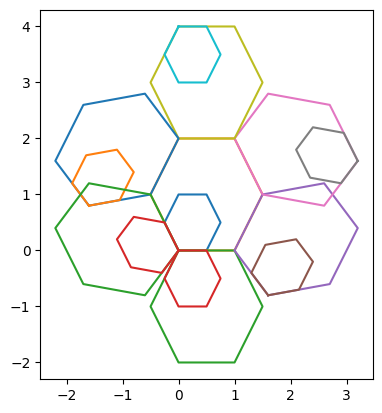

In [4]:
hexa = Polygon((0,0), (1,0), (1.5,1), (1,2), (0,2), (-.5, 1))
hexa2 = Polygon((0,0), (.5,0), (.75,.5), (.5,1), (0,1,), (-.25,.5))

plt.figure()
plot_polygon(hexa2)
plot_polygon(hexa)

for _ in hexa.sides:
    plot_polygon(hexa.reflect(Line(_.p1, _.p2)))
    plot_polygon(hexa2.reflect(Line(_.p1, _.p2)))

plt.show()

In [5]:
def polygon_core(poly:Polygon, sc=10, plot_edgeboxes=False):
    prev_v = None
    core = None
    
    prev_core_part = None

    t1 = pi/2
    t2 = (3/2) * pi

    for v in poly.vertices:

        if prev_v != None:
            angle = atan2(prev_v.y-v.y, prev_v.x-v.x)

            print(angle, angle + t1, angle + t2, cos(angle), sin(angle))
            
            v11 = Point2D(v.x + sc*cos(angle + t1), v.y + sc*sin(angle + t1))
            v12 = Point2D(v.x + sc*cos(angle + t2), v.y + sc*sin(angle + t2))
            v21 = Point2D(prev_v.x + sc*cos(angle + t1), prev_v.y + sc*sin(angle + t1))
            v22 = Point2D(prev_v.x + sc*cos(angle + t2), prev_v.y + sc*sin(angle + t2))

            print(v11, v12, v21, v22)
            
            E = Polygon(v11, v12, v21, v22)
            E = sort_polygon_vertices(E)
            
            if plot_edgeboxes:
                plot_polygon(E, l='dashed')

            if prev_core_part == None:
                core = E
            else:
                core = polygon_intersection(core, E)

            prev_core_part = core

        prev_v = v

    return core

3.141592653589793 4.71238898038469 7.853981633974483 -1.0 1.2246467991473532e-16
Point2D(1, -2) Point2D(1, 2) Point2D(-183697019872103/500000000000000000000000000000, -2) Point2D(612323399573677/1000000000000000000000000000000, 2)
-2.0344439357957027 -0.46364760900080615 2.677945044588987 -0.4472135954999579 -0.8944271909999159
Point2D(328885438199983/100000000000000, 26393202250021/250000000000000) Point2D(-36106797749979/125000000000000, 23680339887499/12500000000000) Point2D(278885438199983/100000000000000, -223606797749979/250000000000000) Point2D(-98606797749979/125000000000000, 223606797749979/250000000000000)
Point2D(438142958611362257816513678476312127062425543/1788854381999831219071479305681187872937574457000000000000000, 894427190999914996037069347243294260132337782/1788854381999831219071479305681187872937574457) Point2D(61613853554722912102718406017755243835837843/111803398874989451191967456605104858228577087406250000000000, 6260990336999421147491666693806098661545016622/357

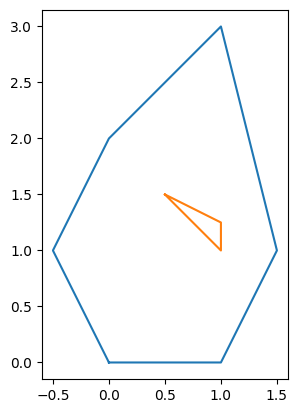

In [6]:
plt.figure()

hexa = Polygon((0,0), (1,0), (1.5,1), (1,3), (0,2), (-.5, 1))

plot_polygon(hexa)
core = polygon_core(hexa, sc=2)
plot_polygon(core)

plt.show()

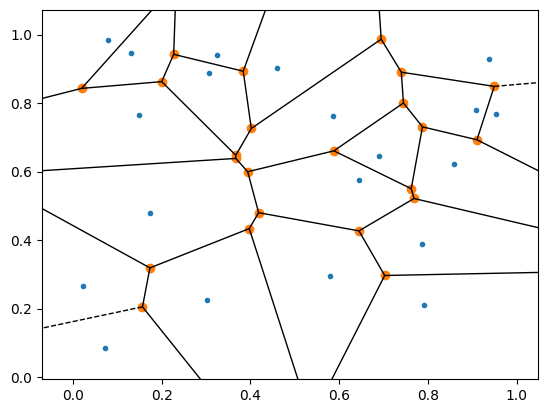

In [3]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from random import uniform as U
import matplotlib.pyplot as plt

points = []

n = 20
while(n > 0):
    points.append([U(0,1), U(0,1)])
    n -= 1
    
vor = Voronoi(points)

fig = voronoi_plot_2d(vor)
plt.show()

In [12]:
print(list(vor.ridge_dict.keys()))
print(vor.regions)

[(0, 16), (0, 8), (0, 7), (0, 5), (0, 15), (0, 6), (16, 8), (16, 9), (16, 14), (16, 6), (10, 17), (10, 8), (10, 9), (10, 3), (10, 11), (10, 14), (17, 15), (17, 8), (17, 3), (8, 9), (8, 15), (9, 14), (3, 1), (3, 11), (3, 15), (11, 1), (11, 14), (7, 19), (7, 5), (7, 15), (7, 13), (7, 2), (15, 13), (15, 1), (15, 4), (12, 6), (12, 5), (12, 14), (6, 5), (6, 14), (5, 19), (18, 2), (18, 13), (18, 4), (18, 19), (18, 1), (2, 19), (2, 13), (13, 4), (4, 1), (19, 1)]
[[13, 1, 6, 8, 5, 12], [14, 3, 2, 1, 13], [20, 16, 15, 18, 17, 19], [18, 11, 7, 15], [16, 2, 1, 6, 7, 15], [20, 3, 2, 16], [18, 11, 10, 0, 17], [19, -1, 0, 17], [22, 9, 8, 5, 4, 21], [24, 9, 8, 6, 7, 11, 10, 23], [-1, 26, 25], [26, 14, 13, 12, 25], [-1, 4, 5, 12, 25], [-1, 19, 20, 3, 14, 26], [], [31, 28, 27, 29, 30], [29, 21, 22, 27], [28, 24, 9, 22, 27], [31, 23, 24, 28], [30, -1, 4, 21, 29], [31, 23, 10, 0, -1, 30]]


In [ ]:
def neighborhood_overlap(polygon)

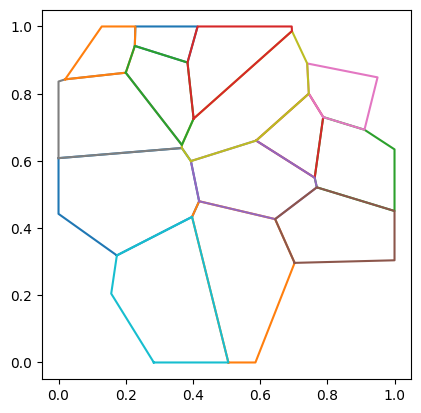

In [5]:
for p in polygons:
    plot_polygon(p)